In [2]:
import numpy as np
import pandas as pd

import seaborn as sns

from tqdm.auto import tqdm

import gvs_ab as ab

#### A/A-тест, который сходится

 Используется распределение, сходное с распределением средних чеков

In [3]:
n = 1000     # Количество наблюдений распределения
scale = 100  # МО

In [4]:
s1 = pd.DataFrame({  # Выборка 1
    'observations': np.random.exponential(scale=scale, size=n),
    'sample': '1'
})
s2 = pd.DataFrame({  # Выборка 2
    'observations': np.random.exponential(scale=scale, size=n),
    'sample': '2'
})
df = pd.concat([s1, s2]).reset_index(drop=True)

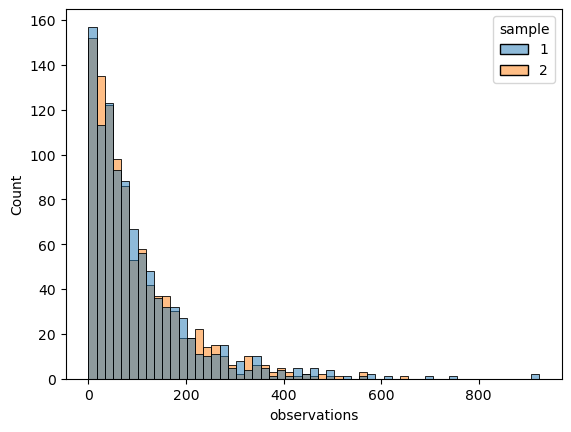

In [5]:
sns.histplot(data=df, x='observations', hue='sample');

  0%|          | 0/10000 [00:00<?, ?it/s]

min sample size: 1000
synthetic subsample size: 100


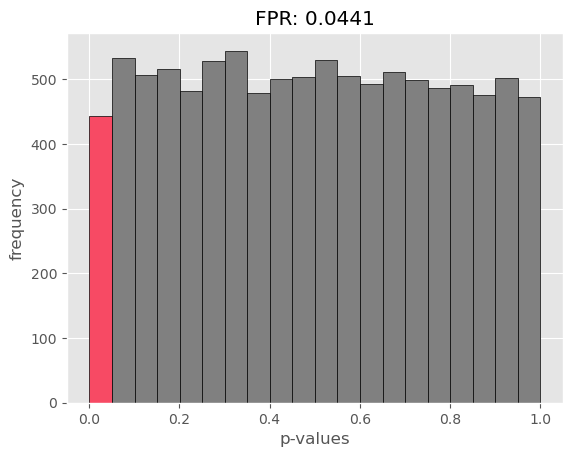

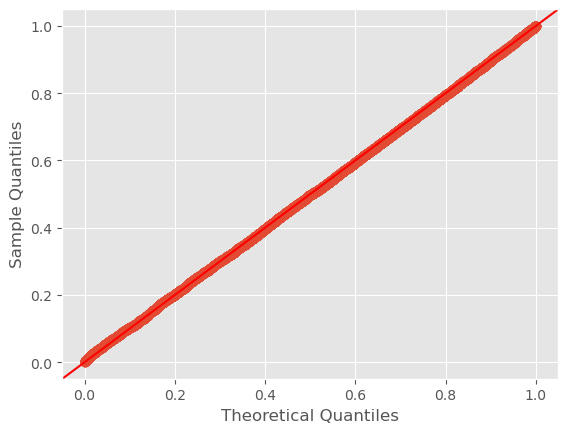

0.0441

In [6]:
ab.aa_test(
    df.query('sample == "1"').observations, 
    df.query('sample == "2"').observations
)

_Вероятность ошибки 1го рода с указанным исходными данными_

In [7]:
N = 100  # Количество A/A теестов
fpr_toler = 0.055  # С каким максимальным fpr A/A теста мы готовы смириться, 
                   # чтобы считать, что не обнаружено статзначимой разницы

In [8]:
# t-test
fprs = []
for i in tqdm(range(N)):
    s1 = pd.Series(np.random.exponential(scale=scale, size=n))  # Выборка 1
    s2 = pd.Series(np.random.exponential(scale=scale, size=n))  # Выборка 2

    fprs.append(ab.aa_test(s1, s2, print_info=False))

# Итоговый FPR
FPR =  sum(fpr > fpr_toler for fpr in fprs)/N
print(f'FPR: {round(FPR, 3)}')

  0%|          | 0/100 [00:00<?, ?it/s]

FPR: 0.28


In [9]:
# U-test
fprs = []
for i in tqdm(range(N)):
    s1 = pd.Series(np.random.exponential(scale=scale, size=n))  # Выборка 1
    s2 = pd.Series(np.random.exponential(scale=scale, size=n))  # Выборка 2

    fprs.append(ab.aa_test(s1, s2, test='u', print_info=False))

# Итоговый FPR
FPR =  sum(fpr > fpr_toler for fpr in fprs)/N
print(f'FPR: {round(FPR, 3)}')

  0%|          | 0/100 [00:00<?, ?it/s]

FPR: 0.25


#### A/A-тест, который НЕ сходится

In [10]:
dif_percent = 10  # % отличия МО

s1 = pd.DataFrame({  # Выборка 1
    'observations': np.random.exponential(scale=scale, size=n),
    'sample': '1'
})
s2 = pd.DataFrame({  # Выборка 2
    'observations': np.random.exponential(scale=scale*(1 + dif_percent/100), size=n),
    'sample': '2'
})
df = pd.concat([s1, s2]).reset_index(drop=True)

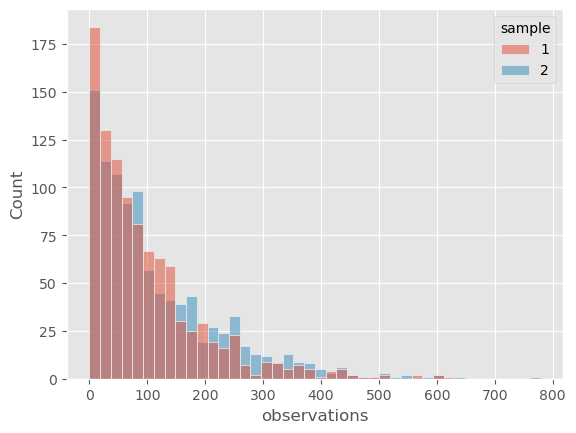

In [11]:
sns.histplot(data=df, x='observations', hue='sample');

  0%|          | 0/10000 [00:00<?, ?it/s]

min sample size: 1000
synthetic subsample size: 100


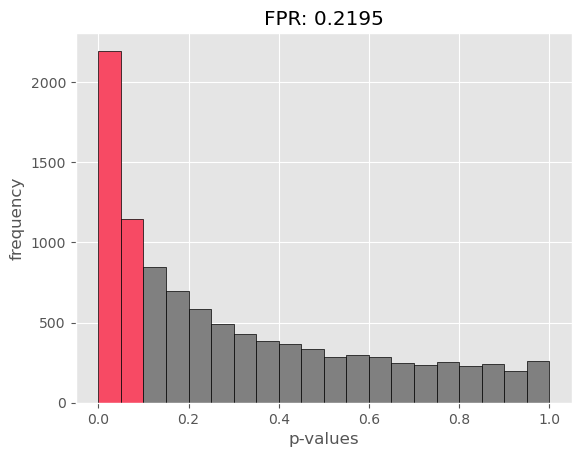

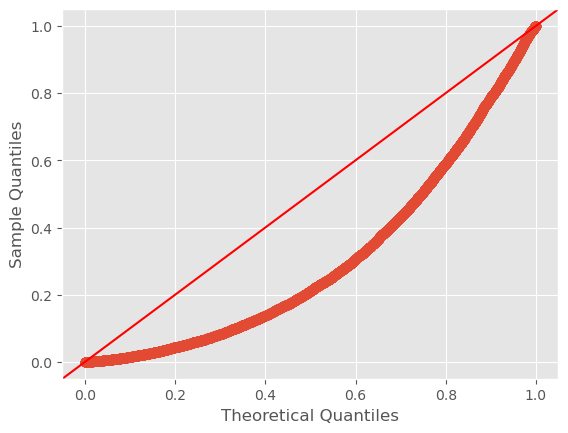

0.2195

In [12]:
ab.aa_test(
    df.query('sample == "1"').observations, 
    df.query('sample == "2"').observations
)

_Вероятность правильного детектирования отличий_

In [13]:
# t-test
tprs = []
for i in tqdm(range(N)):
    s1 = pd.Series(np.random.exponential(scale=scale, size=n))  # Выборка 1
    s2 = pd.Series(np.random.exponential(scale=scale*(1 + dif_percent/100), size=n))  # Выборка 2

    tprs.append(ab.aa_test(s1, s2, print_info=False))

# Итоговый TPR
TPR =  sum(tpr > fpr_toler for tpr in tprs)/N
print(f'TPR: {round(TPR, 3)}')

  0%|          | 0/100 [00:00<?, ?it/s]

TPR: 0.85


In [14]:
# U-test
tprs = []
for i in tqdm(range(N)):
    s1 = pd.Series(np.random.exponential(scale=scale, size=n))  # Выборка 1
    s2 = pd.Series(np.random.exponential(scale=scale*(1 + dif_percent/100), size=n))  # Выборка 2

    tprs.append(ab.aa_test(s1, s2, test='u', print_info=False))

# Итоговый TPR
TPR =  sum(tpr > fpr_toler for tpr in tprs)/N
print(f'TPR: {round(TPR, 3)}')

  0%|          | 0/100 [00:00<?, ?it/s]

TPR: 0.7


Inspired by: KCM7L10